# **Jacob Shearer - Final Project**

In [3]:
import random
import numpy as np
import scipy.fft as fft
import scipy.stats as stats
import matplotlib.pyplot as plt

In [110]:
def test_signal(n_sample_points, sample_spacing):
    # 0.01 to avoid annoying div by zero errors
    sampling_times = np.linspace(0.01, n_sample_points*sample_spacing, n_sample_points)
    A = 1
    analog_signal = lambda t: A*np.e**(-(1/2)*(np.log(t/7)/0.45)**2)
    digital_signal = analog_signal(sampling_times)
    return sampling_times, digital_signal

In [37]:
def ft(n_sample_points, sample_spacing, times, signal):
    frequencies = fft.fftfreq(n_sample_points, sample_spacing)
    signal_fft = fft.fft(signal)
    return frequencies, signal_fft

In [6]:
def ift(signal_fft):
    signal = np.real(fft.ifft(signal_fft))
    return signal

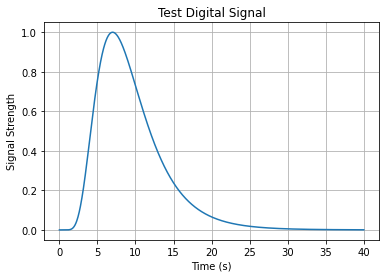

In [111]:
n_sample_points = 1000
sample_spacing = 1/25
times, signal = test_signal(n_sample_points, sample_spacing)
plt.plot(times, signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.title('Test Digital Signal')
plt.grid()
plt.show()

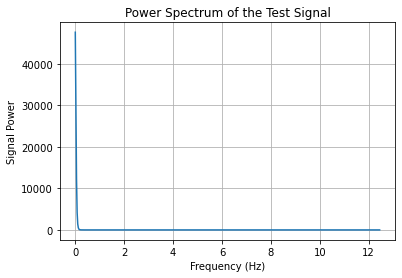

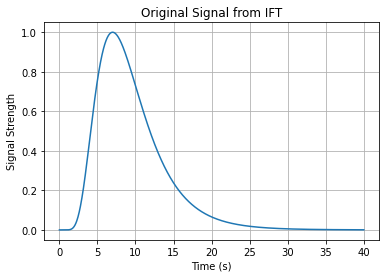

In [156]:
frequencies, signal_fft = ft(n_sample_points, sample_spacing, times, signal)
power_spectrum = np.abs(signal_fft)**2
negative_freq_locs = np.where(np.sign(frequencies) == -1)
cut = negative_freq_locs[0][0] - 1
plt.plot(frequencies[:cut], power_spectrum[:cut])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Signal Power')
plt.title('Power Spectrum of the Test Signal')
plt.grid()
plt.show()

original_signal = ift(signal_fft)
plt.plot(times, original_signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.title('Original Signal from IFT')
plt.grid()
plt.show()

In [141]:
def add_noise(signal, noise_amplitude, seed_n=None):
    if seed_n is not None:
        np.random.seed(seed_n)
    
    noise_function = lambda:noise_amplitude*np.random.normal(0, 1)
    noisy_signal = np.zeros(len(signal))
    for i in range(len(signal)):
        noisy_signal[i] = signal[i] + noise_function()
    
    return noisy_signal

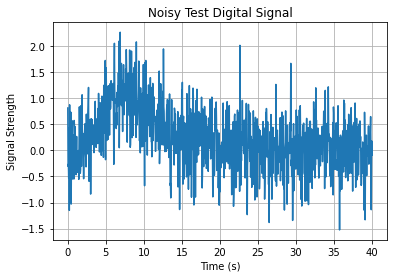

In [148]:
n_sample_points = 1000
sample_spacing = 1/25
times, signal = test_signal(n_sample_points, sample_spacing)
seed_n = 1
noise_amplitude = 0.5
noisy_signal = add_noise(signal, noise_amplitude, seed_n)
plt.plot(times, noisy_signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.title('Noisy Test Digital Signal')
plt.grid()
plt.show()

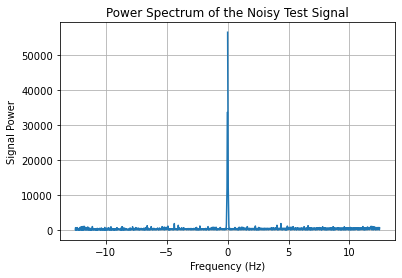

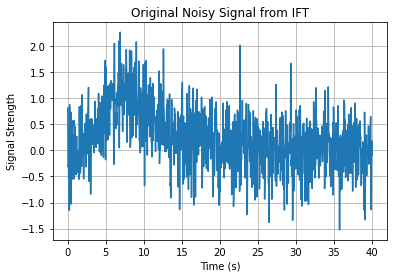

In [158]:
frequencies, noisy_signal_fft = ft(n_sample_points, sample_spacing, times, noisy_signal)
noisy_power_spectrum = np.abs(noisy_signal_fft)**2
plt.plot(frequencies, noisy_power_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Signal Power')
plt.title('Power Spectrum of the Noisy Test Signal')
plt.grid()
plt.show()

original_noisy_signal = ift(noisy_signal_fft)
plt.plot(times, original_noisy_signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.title('Original Noisy Signal from IFT')
plt.grid()
plt.show()